### 1.データの取得
- データの読み込み
- 特徴量Xと正解ラベルyの設定

#### ・データの読み込み

In [393]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

#### ・特徴量Xと正解ラベルyの設定

In [394]:
x_train = train.iloc[:,1:-1]
x_test = test.iloc[:,1:]
y_train = train['SalePrice']

In [395]:
x_train['Flg'] = 0
x_test['Flg'] = 1
x = pd.concat([x_train,x_test],sort=False)

In [396]:
# train['SaleCondition'].unique()
# train2 = train.copy()
# train2.drop('SalePrice',axis=1,inplace=True)

### 2.データの分析
- 欠損状況の確認
- 基本統計量の確認

In [397]:
# print(x.dtypes)

In [398]:
y_train.isnull().sum()

0

In [399]:
for i in range(x.shape[1]):
    print('%d : %s : %s' %(i, x.iloc[:,i].name,x.iloc[:,i].dtypes))

    if x.iloc[:,i].dtypes == object:
        print(list(x.iloc[:,i].unique()))
    else:
        print('種類：%d、最小値：%f、最大値：%f、欠損データ有無：%s' %(len(x.iloc[:,i].unique()),x.iloc[:,i].min(),x.iloc[:,i].max(), x.isnull().sum()[i]))

0 : MSSubClass : int64
種類：16、最小値：20.000000、最大値：190.000000、欠損データ有無：0
1 : MSZoning : object
['RL', 'RM', 'C (all)', 'FV', 'RH', nan]
2 : LotFrontage : float64
種類：129、最小値：21.000000、最大値：313.000000、欠損データ有無：486
3 : LotArea : int64
種類：1951、最小値：1300.000000、最大値：215245.000000、欠損データ有無：0
4 : Street : object
['Pave', 'Grvl']
5 : Alley : object
[nan, 'Grvl', 'Pave']
6 : LotShape : object
['Reg', 'IR1', 'IR2', 'IR3']
7 : LandContour : object
['Lvl', 'Bnk', 'Low', 'HLS']
8 : Utilities : object
['AllPub', 'NoSeWa', nan]
9 : LotConfig : object
['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
10 : LandSlope : object
['Gtl', 'Mod', 'Sev']
11 : Neighborhood : object
['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste']
12 : Condition1 : object
['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn

In [400]:
x.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Flg
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,0.499829
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,0.500086
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,0.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,1.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,1.000000


#### ・数値型に対して欠損値を視覚化 

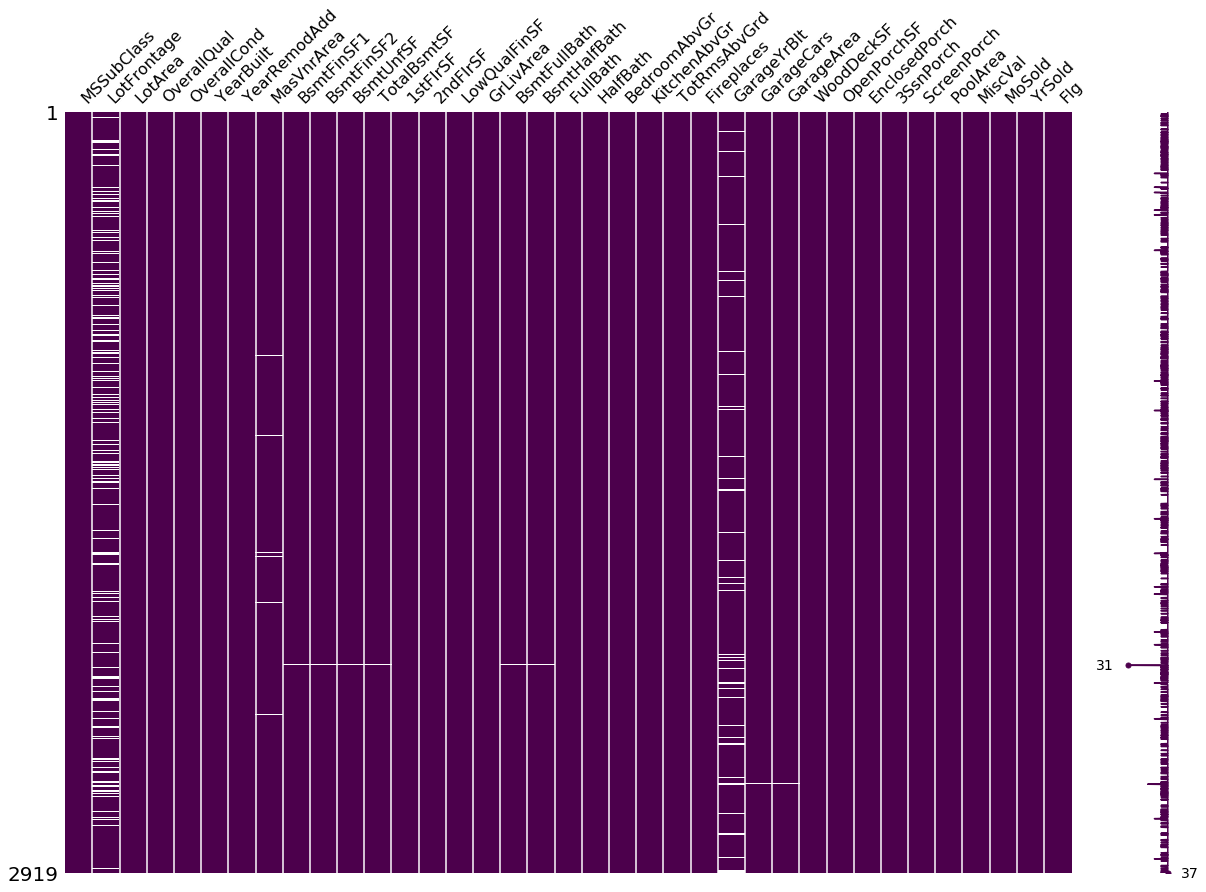

In [401]:
import missingno as msno
msno.matrix(df=x.select_dtypes(include=[int, float, 'datetime']), figsize=(20,14), color=(0.3,0,0.3))

In [402]:
x.isnull().apply(lambda cl:cl.value_counts()).fillna(0).astype(int)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Flg
False,2919,2915,2433,2919,2919,198,2919,2919,2917,2919,...,2919,10,571,105,2919,2919,2919,2918,2919,2919
True,0,4,486,0,0,2721,0,0,2,0,...,0,2909,2348,2814,0,0,0,1,0,0


### 3.データの加工
- 欠損値の補完
- 特徴のマージ
- One-hot-vectorの作成
- trainデータとtestデータの分割
- ターゲットの標準化

#### ・欠損値の多い項目を取得する

In [403]:
print(len(x))
for i in range(x.shape[1]):
    if x.iloc[:,i].isnull().sum() != 0:
        print('%s  %s  %d' %(x.iloc[:,i].name,x.iloc[:,i].dtype,x.iloc[:,i].isnull().sum()))

2919
MSZoning  object  4
LotFrontage  float64  486
Alley  object  2721
Utilities  object  2
Exterior1st  object  1
Exterior2nd  object  1
MasVnrType  object  24
MasVnrArea  float64  23
BsmtQual  object  81
BsmtCond  object  82
BsmtExposure  object  82
BsmtFinType1  object  79
BsmtFinSF1  float64  1
BsmtFinType2  object  80
BsmtFinSF2  float64  1
BsmtUnfSF  float64  1
TotalBsmtSF  float64  1
Electrical  object  1
BsmtFullBath  float64  2
BsmtHalfBath  float64  2
KitchenQual  object  1
Functional  object  2
FireplaceQu  object  1420
GarageType  object  157
GarageYrBlt  float64  159
GarageFinish  object  159
GarageCars  float64  1
GarageArea  float64  1
GarageQual  object  159
GarageCond  object  159
PoolQC  object  2909
Fence  object  2348
MiscFeature  object  2814
SaleType  object  1


#### ・欠損値の多い項目は特徴から削除する

In [404]:
x_rm_missing = x.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

#### ・数値型の欠損値を中央値で保管する

In [405]:
x_rm_missing.fillna(x_rm_missing.median(),inplace=True)

#### ・特徴をマージする

In [406]:
s = [s for s in list(x_rm_missing.columns.values) if 'SF' in s]

In [407]:
x_rm_missing['Total_SF'] = 0
for i in s :
    x_rm_missing['Total_SF'] = x_rm_missing['Total_SF'] + x_rm_missing[i]
    x_rm_missing.drop(i,axis=1,inplace=True)

#### ・項目をリスト値変換する

In [408]:
value_mapping = {'N':0, 'Y':1}
x_rm_missing['CentralAir'] = x_rm_missing['CentralAir'].map(value_mapping)

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      0
       ..
1429    1
1430    1
1431    0
1432    0
1433    0
1434    1
1435    1
1436    1
1437    1
1438    1
1439    1
1440    1
1441    1
1442    1
1443    1
1444    1
1445    1
1446    1
1447    1
1448    1
1449    1
1450    1
1451    1
1452    1
1453    1
1454    1
1455    1
1456    1
1457    1
1458    1
Name: CentralAir, Length: 2919, dtype: int64

#### ・One-hot-vectorに変換

In [409]:
# col_name = list(x.select_dtypes(include=[object]).columns.values)
# x_Ohe = pd.get_dummies(x, columns=col_name,dummy_na=True)
x_Ohe = pd.get_dummies(x_rm_missing)

#### ・オブジェクトをラベルに変換

In [410]:
# from sklearn.preprocessing import LabelEncoder
# for i in range(train.shape[1]):
#     if train.iloc[:,i].dtypes == object:
#         lbl = LabelEncoder()
#         lbl.fit(list(train.iloc[:,i].values) + list(test.iloc[:,i].values))
#         train.iloc[:,i] = lbl.transform(list(train.iloc[:,i].values))
#         test.iloc[:,i] = lbl.transform(list(test.iloc[:,i].values))        

#### ・trainデータとtestデータに分割する

In [411]:
x_ohe_train = x_Ohe[x_Ohe['Flg'] == 0].drop('Flg',axis=1)
x_ohe_test = x_Ohe[x_Ohe['Flg'] == 1].drop('Flg',axis=1)

#### ・ターゲットが正規分布に従っているか確認する

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


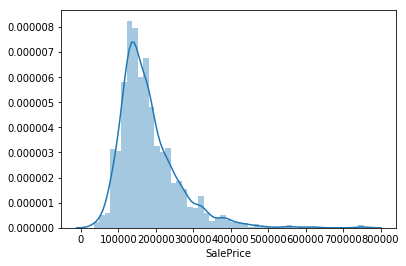

In [412]:
sns.distplot(y_train)
plt.show()

#### ・正規分布に従うようにlogに入れる

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


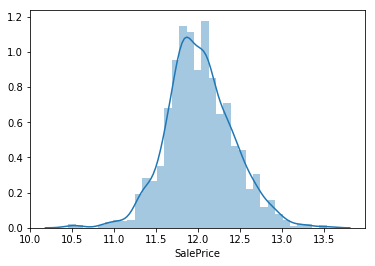

In [413]:
y_train_norm = np.log(y_train)
sns.distplot(y_train_norm)
plt.show()

### 4. 学習器の作成と評価
- ホールドアウトによる学習用データ、検証用データの分割
- ランダムフォレストによる予測モデル作成
- 作成したモデルによる予測値算出
- RMSEによるモデル評価

#### ・ホールドアウトによる学習用データ、検証用データの分割

In [414]:
from sklearn.model_selection import train_test_split
(X_train, X_test, Y_train, Y_test) = train_test_split(x_ohe_train, y_train_norm,test_size =0.2, random_state=0)

#### ・random forestを使用する

In [417]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_features='auto',max_depth = 3)
rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### ・MSEを計算する

In [418]:
from sklearn.metrics import mean_squared_error
display(np.sqrt(mean_squared_error(np.exp(Y_train), np.exp(rf.predict(X_train)))))
display(np.sqrt(mean_squared_error(np.exp(Y_test), np.exp(rf.predict(X_test)))))

35757.08237764982

42060.52823855146

#### ・特徴の重要度を確認する

In [419]:
feature=rf.feature_importances_
f = pd.DataFrame({'number': range(len(feature)),'name':X_train.columns.values,
             'feature': feature[:]}).sort_values('feature',ascending=False)

In [437]:
f['number'].head(20).astype(str)

3        3
28      28
8        8
19      19
9        9
5        5
20      20
29      29
229    229
33      33
173    173
4        4
6        6
242    242
13      13
63      63
7        7
243    243
175    175
214    214
Name: number, dtype: object

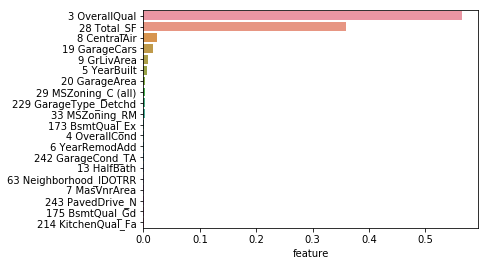

In [439]:
sns.barplot(x=f['feature'].head(20),y=f['number'].head(20).astype(str)+' '+f['name'].head(20))
plt.show()